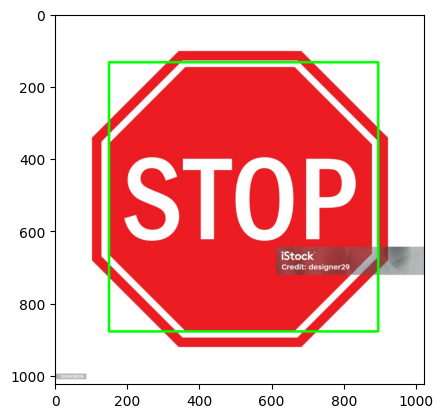

In [4]:
import cv2
from matplotlib import pyplot as plt

# Opening image
img = cv2.imread("image2.jpg")

# OpenCV opens images as BRG 
# but we want it as RGB We'll 
# also need a grayscale version
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


# Use minSize because for not 
# bothering with extra-small 
# dots that would look like STOP signs
stop_data = cv2.CascadeClassifier('stop_data.xml')

found = stop_data.detectMultiScale(img_gray, 
								minSize =(20, 20))

# Don't do anything if there's 
# no sign
amount_found = len(found)

if amount_found != 0:
	
	# There may be more than one
	# sign in the image
	for (x, y, width, height) in found:
		
		# We draw a green rectangle around
		# every recognized sign
		cv2.rectangle(img_rgb, (x, y), 
					(x + height, y + width), 
					(0, 255, 0), 5)
		
# Creates the environment of 
# the picture and shows it
plt.subplot(1, 1, 1)
plt.imshow(img_rgb)
plt.show()
